# NB-AK7- plot of annual cycle of LH and SH at glacier pixel
 - to examine negative ET over the glacier fields

## module loading...

In [1]:
%matplotlib inline  
import os
import sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from timeit import default_timer as timer

print("\nThe Python version: %s.%s.%s" % sys.version_info[:3])
print(xr.__name__, xr.__version__)

mpl.rcParams['xtick.labelsize']='small'


The Python version: 3.7.0
xarray 0.16.2


In [2]:
from cmip5_oconus import print_date
print_date()

from cmip5_oconus.data_catalog import load_monthly_historical_hydro_datasets, resample_data
from cmip5_oconus.data_catalog import load_monthly_cmip5_hydro_datasets
from cmip5_oconus.plot import custom_div_cmap, MidpointNormalize, add_ylabel
from cmip5_oconus.utils import calc_change
from cmip5_oconus.data_catalog import DOMAIN

Last executed: 2021-03-06 09:14:19.561308 by mizukami on casper03


Dask jobque

In [3]:
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster(processes=9, threads=4, memory="108GB",
#                  walltime='00:40:00')
#cluster.scale(jobs=3)

#from dask_jobqueue import SLURMCluster
#cluster = SLURMCluster()
#cluster.scale(jobs=5)

In [4]:
#from dask.distributed import Client
#client = Client(cluster)

In [5]:
#client

-------------------------
## Setup 

In [10]:
figSave = True

In [4]:
gcms            = ["ACCESS1-3","CanESM2","CCSM4","CSIRO-Mk3-6-0","GFDL-ESM2M","HadGEM2-ES","inmcm4","MIROC5","MPI-ESM-MR","MRI-CGCM3"]
hydro_flux_vars = ['NET_SHORT', 'NET_LONG','LATENT', 'SENSIBLE', 'GRND_FLUX', 'EVAP']
period_hist     = slice('1970-01-01', '1999-12-31')
period_futr     = {'early' : slice('2010-01-01', '2039-12-31'),
                   'middle': slice('2040-01-01', '2069-12-31'),
                   'late'  : slice('2070-01-01', '2099-12-31')}

## Load the data

In [5]:
xr.set_options(file_cache_maxsize=12000)
histo_data = load_monthly_historical_hydro_datasets(models=gcms, variables=hydro_flux_vars, region='AK', parallel=False)
rcp85_data = load_monthly_cmip5_hydro_datasets(scen='rcp85', models=gcms, variables=hydro_flux_vars, region='AK', parallel=False)

load_monthly_historical_hydro_datasets
load_monthly_cmip5_hydro_datasets
load_cmip5_dataset


100%|██████████| 10/10 [02:49<00:00, 16.98s/it]


load_obs_dataset
load_monthly_cmip5_hydro_datasets
load_cmip5_dataset


100%|██████████| 10/10 [03:06<00:00, 18.66s/it]


## Compute difference in 30 year annual mean between historical and future

In [7]:
histo_hydro_season = histo_data['gcm'].sel(time=period_hist).groupby('time.month').mean(dim="time").persist()

rcp85_hydro_season = {}
for key, futr_period in period_futr.items():
    rcp85_hydro_season[key] = rcp85_data.sel(time=futr_period).groupby('time.month').mean('time').persist()

/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## Plotting

------------
 - Change in 30yr mean annual LH & SH flux between historical and late in 21st century

/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizuka

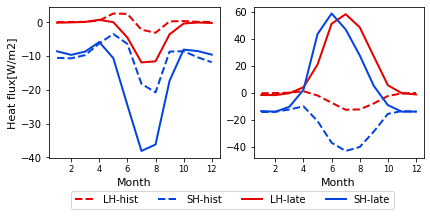

In [11]:
style_kwargs = {'hist': {'ls': '--'},
               'rcp'  : {'ls': '-'}}
kwargs       = {'hist': {'LATENT':{'lw':2.0, 'color':'xkcd:red', **style_kwargs['hist']}, 'SENSIBLE':{'lw':2.0, 'color':'xkcd:blue', **style_kwargs['hist']}},
                'rcp':  {'LATENT':{'lw':2.0, 'color':'xkcd:red', **style_kwargs['rcp']},  'SENSIBLE':{'lw':2.0, 'color':'xkcd:blue', **style_kwargs['rcp']}}
               }
xlabel = []
var_title = {'LATENT':'Latent heat', 'SENSIBLE':'Sensible heat', 'NET_SHORT':'Net SW', 'NET_LONG':'Net LW'}

loc = [(185, 52),(151,55)]  #(150,60) (170, 50)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(6.5,3.5))
for col, _ in enumerate(loc):
        
    ax=axes[col]
    histo_hydro_season.mean(dim='gcm')['LATENT'].sel(x=loc[col][0],y=loc[col][1]).plot.line(ax=ax, x='month', label='LH-hist', **kwargs['hist']['LATENT'])
    histo_hydro_season.mean(dim='gcm')['SENSIBLE'].sel(x=loc[col][0],y=loc[col][1]).plot.line(ax=ax, x='month', label='SH-hist', **kwargs['hist']['SENSIBLE']) 

    rcp85_hydro_season['late'].mean(dim='gcm')['LATENT'].sel(x=loc[col][0],y=loc[col][1]).plot.line(ax=ax, x='month', label=f'LH-late', **kwargs['rcp']['LATENT'])
    rcp85_hydro_season['late'].mean(dim='gcm')['SENSIBLE'].sel(x=loc[col][0],y=loc[col][1]).plot.line(ax=ax, x='month', label=f'SH-late', **kwargs['rcp']['SENSIBLE'])
    
    ax.set_xticks(np.arange(2, 13, step=2))
    
    if col==0:
        ax.set_ylabel('Heat flux[W/m2]', fontsize=11)
    else:
        ax.set_ylabel('')    

    #ax.set_title(var_title[var], fontsize=12)
    ax.set_xlabel('Month',fontsize=11)
            
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.30)  # create some space below the plots by increasing the bottom-value
axes.flatten()[-2].legend(loc='upper left', bbox_to_anchor=(0.10, -0.285, 0.75, 0.1), ncol=5)

if figSave:
    plt.savefig(f'NB-AK7_Fig1_annual_cycle_energy_glacier.png', dpi=300)

/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/mizukami/anaconda3/envs/cmip5_oconus/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


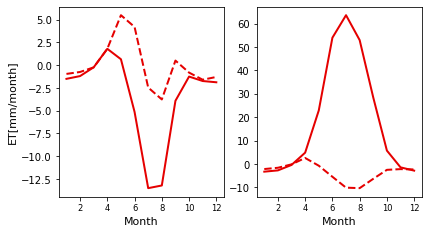

In [9]:
style_kwargs = {'hist': {'ls': '--'},
               'rcp'  : {'ls': '-'}}
kwargs       = {'hist': {'EVAP':{'lw':2.0, 'color':'xkcd:red', **style_kwargs['hist']}},
                'rcp':  {'EVAP':{'lw':2.0, 'color':'xkcd:red', **style_kwargs['rcp']}}
               }
xlabel = []
var_title = {'EVAP':'ET', 'SENSIBLE':'Sensible heat', 'NET_SHORT':'Net SW', 'NET_LONG':'Net LW'}

loc = [(185, 52),(151,55)]  #(150,60) (170, 50)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(6.5,3.5))
for col, var in enumerate(loc):
        
    ax=axes[col]
    histo_hydro_season.mean(dim='gcm')['EVAP'].sel(x=loc[col][0],y=loc[col][1]).plot.line(ax=ax, x='month', **kwargs['hist']['EVAP'])

    rcp85_hydro_season['late'].mean(dim='gcm')['EVAP'].sel(x=loc[col][0],y=loc[col][1]).plot.line(ax=ax, x='month', **kwargs['rcp']['EVAP'])
    
    ax.set_xticks(np.arange(2, 13, step=2))
    
    if col==0:
        ax.set_ylabel('ET[mm/month]', fontsize=11)
    else:
        ax.set_ylabel('')    

    #ax.set_title(var_title[var], fontsize=12)
    ax.set_xlabel('Month',fontsize=11)
            
    #ax.get_legend().remove()

--------
- Climate changes for individual GCMs for late 21st century are plotted below

In [ ]:
histo_hydro_season['LATENT'].isel(x=100,y=50).plot.line(x='month')
histo_hydro_season['SENSIBLE'].isel(x=100,y=50).plot.line(x='month')

In [ ]:
histo_hydro_season['LATENT'].isel(x=100,y=50).plot()